<img src="images/header_image.png"
     style="float: left; width: 400px;"/>

# CZ1015 Introduction to Data Science and Artifical Intelligence Mini Project
## World Happiness Report 
A program coded in Python that analysis World Happiness using the World Happiness Report produced by United Nations Sustainable Development Solutions Network in partnership with the Ernesto Illy Foundation. It contains analysis of happiness of different countries with respect to various factors and a Singapore specific analysis as well. 

Made by **GUPTA JAY, NGUYEN DUY KHANH, TIEU PHAT DAT**  
CZ1015 Introduction to Data Science and Artifical Intelligence  
School of Computer Science and Engineering  
Nanyang Technological University  

### Prerequisites
What things you need to run the program

* CZ1015 Mini Project.ipnyb
* Pandas, Seaborn, Numpy, Matplotlib, Sklearn and Graphviz python libraries
* data.xls

# Problem Statement(s) 
### 1. What are the top factors which affect happiness? Are there any wrong perceived factors about happiness?
### 2. Create your own Country! 
### 3. Economic Analysis of Singapore over the Years

In [23]:
# Importing all the project pre-requisites
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import geopandas as gpd
sb.set()
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Exploratory Data Analysis / Visualization
#### Importing and Cleaning the Dataset

In [52]:
data1=pd.read_csv("data/factor_of_happiness2018.csv")
data2=pd.read_csv("data/factor_of_happiness2018(2).csv")

data1.sort_values(by=["Country"],inplace=True,ascending=True)
data1=data1.reset_index(drop=True)
data1=pd.DataFrame(data1[:156])
data=pd.concat([data1,data2],axis=1)

# Convert all Variable Names to UPPERCASE
data.columns = data.columns.str.upper()

# Remove all spaces and dots from Variable Names
data.columns = data.columns.str.replace(".","")
data.columns = data.columns.str.replace(" ","_")
data.columns = data.columns.str.replace(":","")
data.columns = data.columns.str.replace("+","")
data.columns = data.columns.str.replace(",","")

In [53]:
extracts=["COUNTRY","HAPPINESS_SCORE","GDP_PER_PERSON_2015-2017","HEALTHY_LIFE_EXPECTANCY_2015-2017","SOCIAL_SUPPORT_2015-2017","FREEDOM_TO_MAKE_LIFE_CHOICES_2015-2017","GENEROSITY_2015-2017_WITHOUT_ADJUSTMENT_FOR_GDP_PER_PERSON","PERCEPTIONS_OF_CORRUPTION_2015-2017"]
data=pd.DataFrame(data[extracts])

In [54]:
data.rename(columns = {'GDP_PER_PERSON_2015-2017': 'GDP_PER_PERSON'}, inplace = True)
data.rename(columns = {'FREEDOM_TO_MAKE_LIFE_CHOICES_2015-2017': 'FREEDOM'}, inplace = True)
data.rename(columns = {'HEALTHY_LIFE_EXPECTANCY_2015-2017': 'HEALTHY_LIFE_EXPECTANCY'}, inplace = True)
data.rename(columns = {'SOCIAL_SUPPORT_2015-2017': 'SOCIAL_SUPPORT'}, inplace = True)
data.rename(columns = {'GENEROSITY_2015-2017_WITHOUT_ADJUSTMENT_FOR_GDP_PER_PERSON': 'GENEROSITY'}, inplace = True)
data.rename(columns = {'PERCEPTIONS_OF_CORRUPTION_2015-2017': 'PERCEPTIONS_OF_CORRUPTION'}, inplace = True)

In [55]:
data = data.loc[:,~data.columns.duplicated()]
data.head()

,COUNTRY,HAPPINESS_SCORE,GDP_PER_PERSON,HEALTHY_LIFE_EXPECTANCY,SOCIAL_SUPPORT,FREEDOM,GENEROSITY,PERCEPTIONS_OF_CORRUPTION
0,Afghanistan,3.632,1741.687500,52.013329,0.525075,0.445294,0.179054,0.879705
1,Albania,4.586,11363.095700,68.871552,0.639576,0.726340,0.259975,0.886778
2,Algeria,5.295,13914.723630,65.604858,0.776977,0.439177,0.128988,0.698343
3,Angola,3.795,6260.132813,52.460709,0.765275,0.374173,0.106829,0.833540
4,Argentina,6.388,18807.310550,67.398483,0.905565,0.853390,0.163174,0.847882


Description of the dataset

> **COUNTRY** : Name of each Country   
> **HAPPINESS_SCORE** :A metric measured between 2015 to 2017 by asking the sampled people the question: `"How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."`   
> **GDP_PER_PERSON** : GDP per Capita of each Country in terms of Puchasing Power Parity (PPP) (in USD)  
> **HEALTHY_LIFE_EXPECTANCY** : Healthy Life Expectancy at birth are constructed based on data from the World Health Organization (WHO) and WDI.  
> **SOCIAL_SUPPORT** : National average of the binary responses (either 0 or 1) to the question `“If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”`  
> **FREEDOM** : National average of binary responses to the question `“Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”`   
> **GENEROSITY** : Generosity is the residual of regressing the national average of responses to the question `“Have you donated money to a charity in the past month?”` on GDP per capita.   
> **PERCEPTIONS_OF_CORRUPTION** : Perceptions of corruption are the average of binary answers to two GWP questions: `“Is corruption widespread throughout the government or not?”` and `“Is corruption widespread within businesses or not?”`  

In [28]:
data = data.dropna(how='any',axis=0)
data = data.reset_index(drop=True)

---
Vital statistics of the dataset using the `type` and `shape` attributes

In [29]:
print("Data type : ", type(data))
print("Data dims : ", data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (142, 8)


In [30]:
print(data.dtypes)

COUNTRY                       object
HAPPINESS_SCORE              float64
GDP_PER_PERSON               float64
HEALTHY_LIFE_EXPECTANCY      float64
SOCIAL_SUPPORT               float64
FREEDOM                      float64
GENEROSITY                   float64
PERCEPTIONS_OF_CORRUPTION    float64
dtype: object


# 1. What are the top factors which affect happiness? Are there any wrong perceived factors about happiness?

In [32]:
happiness_score=pd.DataFrame(data["HAPPINESS_SCORE"])
happiness_score.describe().round(2)

,HAPPINESS_SCORE
count,142.00
mean,5.35
std,1.14
min,2.90
25%,4.43
50%,5.33
75%,6.16
max,7.63


### Uni-variate plot of Happiness Score variable

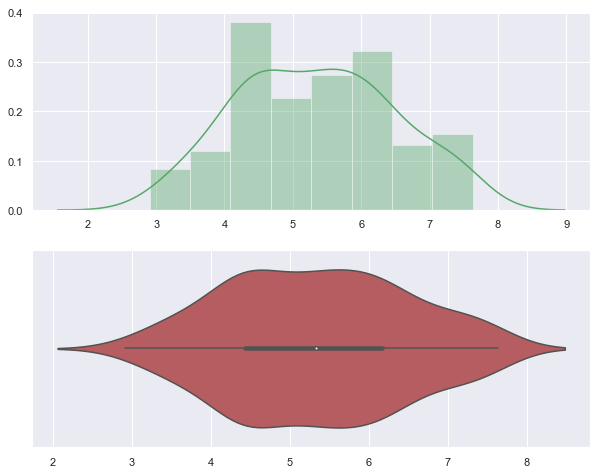

In [33]:
f,axes=plt.subplots(2,1,figsize=(10,8))
sb.distplot(happiness_score,kde=True,hist=True,color="g",ax=axes[0])
sb.violinplot(happiness_score,ax=axes[1],color="r")

## Let us classify the Happiness Score into `3 Categories` with the help of the Violin Plot:
 #### 1. Unhappy (less than 4)
 #### 2. Normal / Likely Happy (between 4 and 6)
 #### 3. Really Happy (more than 6)
 
![Categoies of Happiness](images/Happiness_Categories.png)


In [34]:
happiness=[]
for i in happiness_score["HAPPINESS_SCORE"]:
    if i<4:
        happiness.append("UNHAPPY")
    elif 4<=i<=6:
        happiness.append("NORMAL")
    else:
        happiness.append("HAPPY")
pred_happiness= pd.DataFrame(happiness,columns=["PREDICTED_HAPPINESS"])
pred_happiness=pd.DataFrame(pred_happiness["PREDICTED_HAPPINESS"].astype('category'))
data=pd.concat([data,pred_happiness],axis=1)

In [35]:
data = data.loc[:,~data.columns.duplicated()]
data.head()

,COUNTRY,HAPPINESS_SCORE,GDP_PER_PERSON,HEALTHY_LIFE_EXPECTANCY,SOCIAL_SUPPORT,FREEDOM,GENEROSITY,PERCEPTIONS_OF_CORRUPTION,PREDICTED_HAPPINESS
0,Afghanistan,3.632,1741.687500,52.013329,0.525075,0.445294,0.179054,0.879705,UNHAPPY
1,Albania,4.586,11363.095700,68.871552,0.639576,0.726340,0.259975,0.886778,NORMAL
2,Algeria,5.295,13914.723630,65.604858,0.776977,0.439177,0.128988,0.698343,NORMAL
3,Angola,3.795,6260.132813,52.460709,0.765275,0.374173,0.106829,0.833540,UNHAPPY
4,Argentina,6.388,18807.310550,67.398483,0.905565,0.853390,0.163174,0.847882,HAPPY


### Count of Happiness based on our categorisation

Text(0,0.5,'Number of Countries')

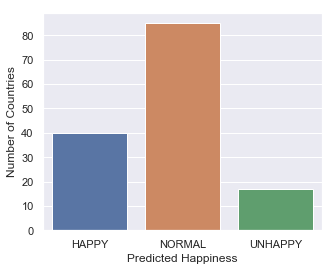

In [36]:
data["PREDICTED_HAPPINESS"].value_counts()
f, axes = plt.subplots(1, 1, figsize=(5, 4))
sb.countplot(data["PREDICTED_HAPPINESS"])
plt.xlabel("Predicted Happiness")
plt.ylabel("Number of Countries")

### Distribution of all variables on different Happiness Categories

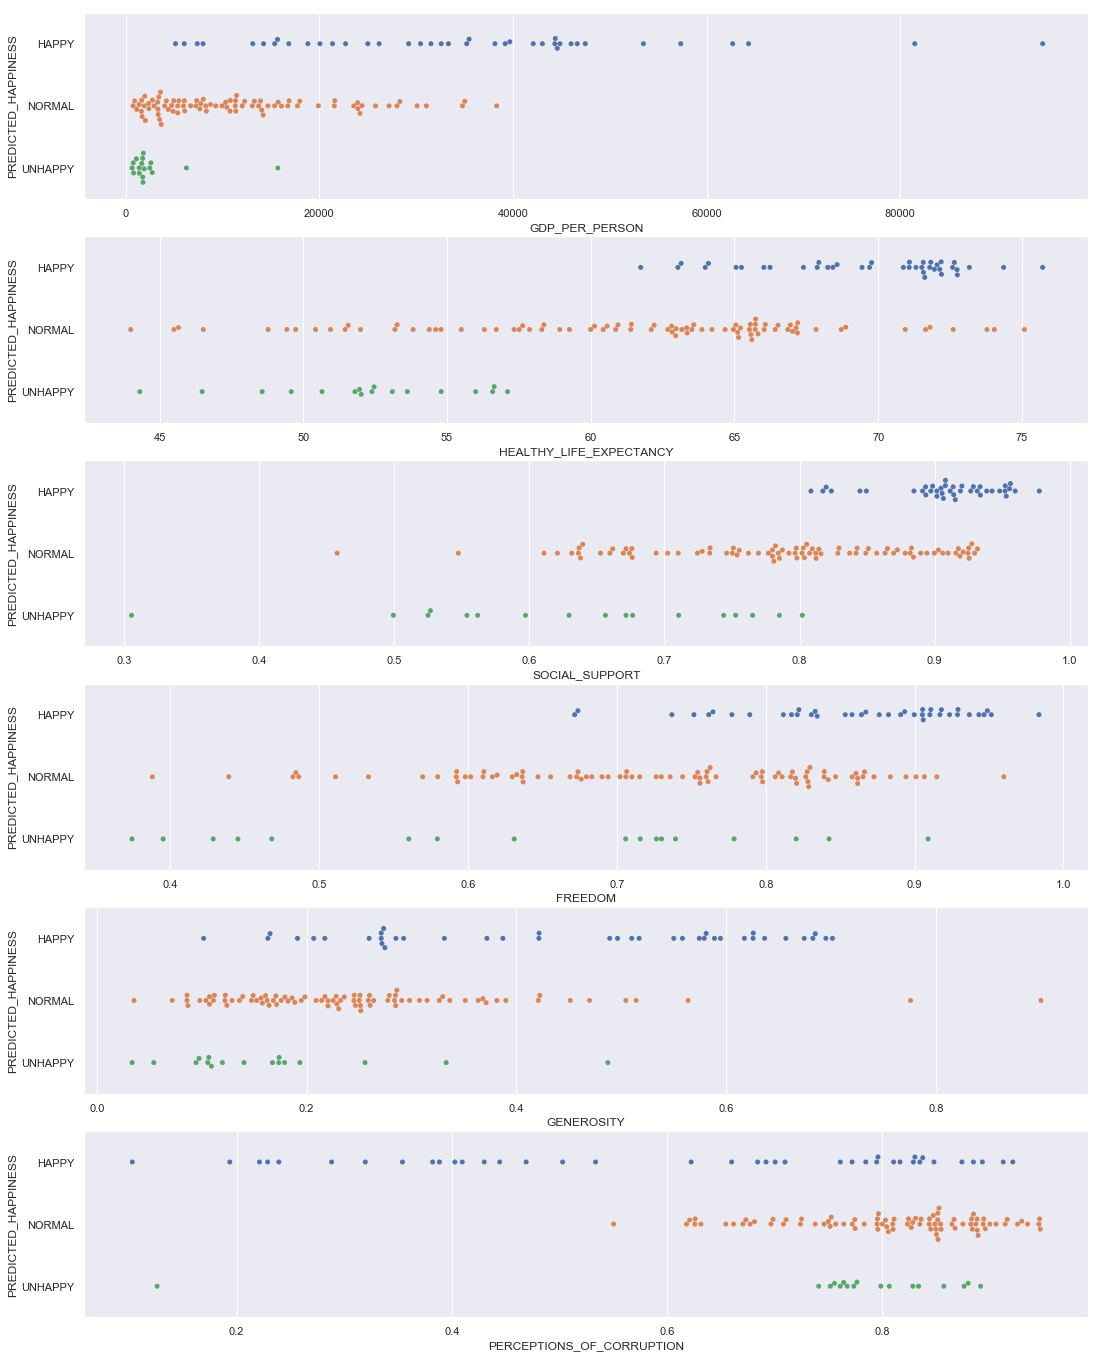

In [37]:
predictors=["GDP_PER_PERSON","HEALTHY_LIFE_EXPECTANCY","SOCIAL_SUPPORT","FREEDOM","GENEROSITY","PERCEPTIONS_OF_CORRUPTION"]
f,axes=plt.subplots(6,1,figsize=(18,24))
count=0
for var in predictors:
    sb.swarmplot(x=var,y="PREDICTED_HAPPINESS",data=data,orient="h",ax=axes[count])
    count+=1

## `Observation 1:`  
## Order of Importance of Variables to predict Happiness
###  `1: Most Important, 7: least important`
1. GDP
2. Life Expectancy
3. Social Support
4. Generosity
5. Corruption
6. Freedom of Life

## `Observation 2:`
## Perceptions about Happiness
### From the order of variables stated above, we can infer that, counter-intuitively, Corruption matters the least at an individual level to citizens of a Country as a factor to their happiness. 

# 2. Create your own Country! 

<img src="images/tree_border.png"
     style="float: left"/>

## Training the dataset using `Random Forest` Classifier algorithm

In [51]:
# Recall the Legendary-Total Dataset
predictors=["GDP_PER_PERSON","HEALTHY_LIFE_EXPECTANCY","SOCIAL_SUPPORT","GENEROSITY"]
x=pd.DataFrame(data[predictors])
y=pd.DataFrame(data["PREDICTED_HAPPINESS"])

# Split the Legendary-Total Dataset into Train and Test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

# Create Random Forest Classifier
forest = RandomForestClassifier(n_estimators=80, random_state=42, max_depth=10, min_samples_split = 0.01, min_samples_leaf = 0.001)
forest.fit(x_train,y_train)

# Predict Happiness using Random Forest Classifier
y_train_pred_forest=forest.predict(x_train)
y_test_pred_forest=forest.predict(x_test)

# Check the Goodness of Fit (by Random Forest Classifier)
print("Goodness of fit by using Random Forest Classifier:")
print("\tThe prediction accuracy on Train set: ",round(forest.score(x_train,y_train),2))
print("\tThe prediction accuracy on Test set: ",round(forest.score(x_test,y_test), 2))
print()

Goodness of fit by using Random Forest Classifier:
	The prediction accuracy on Train set:  1.0
	The prediction accuracy on Test set:  0.86



D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


## Create your own Country! 
### Predict the Happiness Score of your Country

In [54]:
print()
name = input("Enter your Country Name: ")
print()
print("Let us analyse the feasabiliy [Happiness Index] of", name, "by entering some important features: ")
print()
gdp = float(input("Enter the Average GDP Per Capita (in USD): \n[Average GDP Per Capita of all Countries: USD 17000,\nSingapore GDP Per Capita: USD 81000]:  "))
life_expectancy = float(input("Enter the Average Life Expectancy of your Citizens: "))
social_support=float(input("Enter the Social Support Index (Choose betwwen 0 and 1): "))
generosity =float(input("How generous are people in your Country? (Betwwen 0 and 1): "))

new_country ={"GDP_PER_PERSON": [gdp] ,"HEALTHY_LIFE_EXPECTANCY": [life_expectancy] ,"SOCIAL_SUPPORT": [social_support] ,"GENEROSITY": [generosity]}
new_country = pd.DataFrame(new_country)

y_prob = forest.predict_proba(new_country)

y_prob1=pd.DataFrame(list(y_prob[:,0])[0],columns=["Probability Happy"],index=new_country.index)
y_prob2=pd.DataFrame(list(y_prob[:,1])[0],columns=["Probability Normal"],index=new_country.index)
y_prob3=pd.DataFrame(list(y_prob[:,2])[0],columns=["Probability Unhappy"],index=new_country.index)

data_comb = pd.concat([new_country,y_prob1,y_prob2,y_prob3],axis=1)

happy = list(y_prob[:,0])[0]
normal = list(y_prob[:,1])[0]
unhappy = list(y_prob[:,2])[0]

print()

if (normal > happy and normal > unhappy):
    print("Your Country can be better! We can say that the citizens of", name, "will be LIKELY HAPPY / NORMAL with a guarantee of", normal*100, "%")
elif (happy > normal and happy > unhappy):
    print("Congrats! We can say that the citizens of", name, "will be HAPPY with a guarantee of", happy*100, "%")
else:
    print("Oh No! We can say that the citizens of", name, "will be UNHAPPY with a guarantee of", unhappy*100, "%")


Enter your Country Name: Jay

Let us analyse the feasabiliy [Happiness Index] of Jay by entering some important features: 

Enter the Average GDP Per Capita (in USD): 
[Average GDP Per Capita of all Countries: USD 17000,
Singapore GDP Per Capita: USD 81000]:  1
Enter the Average Life Expectancy of your Citizens: 1
Enter the Social Support Index (Choose betwwen 0 and 1): 1
How generous are people in your Country? (Betwwen 0 and 1): 1

Your Country can be better! We can say that the citizens of Jay will be LIKELY HAPPY / NORMAL with a guarantee of 61.25000000000001 %


# 2. Economic Analysis of Singapore
#### Importing and Cleaning the Dataset

In [57]:
data = pd.read_excel('data/data.xls', sheet_name = 'Table2.1')

clean_data = data.copy()

# Rename "#" to "ID" of Pokemon
clean_data.rename(columns = {'Country name': 'Country'}, inplace = True)

# Convert all Variable Names to UPPERCASE
clean_data.columns = clean_data.columns.str.upper()

# Remove all spaces and dots from Variable Names
clean_data.columns = clean_data.columns.str.replace(".","")
clean_data.columns = clean_data.columns.str.replace(" ","_")

clean_data.replace(' ', '_', regex=True)

# Print the Variable Information to check
# clean_data.info()

clean_data.sample(n = 10)

clean_data = clean_data.set_index('COUNTRY')

clean_data = clean_data.loc[["Singapore", "United States", "Canada"]]

sg_data = clean_data[['YEAR', 'DEMOCRATIC_QUALITY', 'PERCEPTIONS_OF_CORRUPTION', 'LIFE_LADDER', 'SOCIAL_SUPPORT']]

sg_data.isnull().sum()

sg_data = sg_data[pd.notnull(sg_data['PERCEPTIONS_OF_CORRUPTION'])]

sg_data = sg_data[pd.notnull(sg_data['DEMOCRATIC_QUALITY'])]

sg_data = sg_data[pd.notnull(sg_data['SOCIAL_SUPPORT'])]

## Analysing Democracy in Singapore

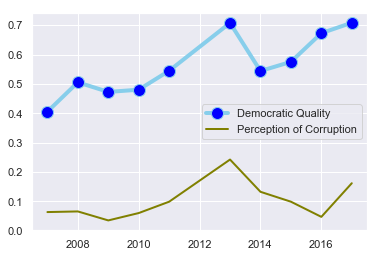

In [16]:
# multiple line plot
plt.plot( 'YEAR', 'DEMOCRATIC_QUALITY', data=sg_data.loc["Singapore"], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Democratic Quality")
plt.plot( 'YEAR', 'PERCEPTIONS_OF_CORRUPTION', data=sg_data.loc["Singapore"], marker='', color='olive', linewidth=2, label="Perception of Corruption")
plt.legend()

## `Observation 1`

### Corruption in Singapore is generally perceived as low. However, a few minor scandals led to an sharp dip in Democratic Quality of the Country.

**SCDF and CNB (2012)** - In January 2012, two senior civil servants were arrested under graft charges. Both men were arrested in connection with the Prevention of Corruption Act relating to an IT contract

**NParks (2012)** - In July 2012, National Parks Board's (NParks) purchase of 26 Brompton bikes costing $2,200 each sparked a nationwide uproar after it was revealed by a whistleblower on online forum HardwareZone of possible corruption due numerous red flags in the way the procurement was done.

**CPIB (2013)** - On 23 July 2013, Corrupt Practices Investigation Bureau (CPIB) assistant director Edwin Yeo Seow Hionh was charged with misappropriating at least $1.7 million from the anti-graft agency between 2008 and 2012.

**MFA (2014)** -  On 20 February 2014, former Ministry of Foreign Affairs (MFA) protocol chief Lim Cheng Hoe, 61, was sentenced to 15 months' jail for cheating.

## `Observation 2`
#### It can be inferred from looking at the data from 2012 till 2014 that as soon as the perception of corruption increased from 2012 to 2013, it immediately led to a sharp decrease in the democratic quality in the subsequent years. 

## Social Support in Singapore

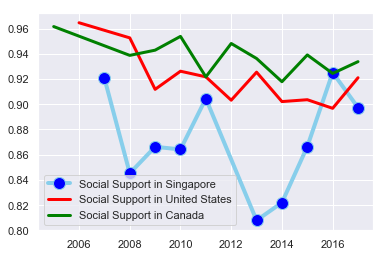

In [17]:
# multiple line plot
plt.plot( 'YEAR', 'SOCIAL_SUPPORT', data=sg_data.loc["Singapore"], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Social Support in Singapore")
plt.plot( 'YEAR', 'SOCIAL_SUPPORT', data=sg_data.loc["United States"], color='red', linewidth=3, label="Social Support in United States")
plt.plot( 'YEAR', 'SOCIAL_SUPPORT', data=sg_data.loc["Canada"], color='green', linewidth=3, label="Social Support in Canada")
plt.legend()

## Life Satisfaction over the years in Singapore

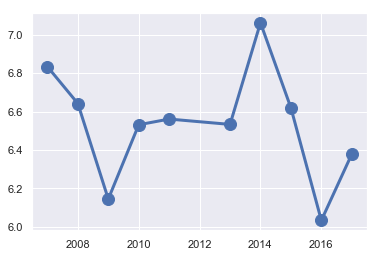

In [18]:
plt.plot('YEAR', 'LIFE_LADDER', data=sg_data.loc['Singapore'], linestyle='-', marker='o', linewidth=3, markersize=12)
plt.show()